<a href="https://colab.research.google.com/github/ankush2805/EIP/blob/master/Week3Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout,GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


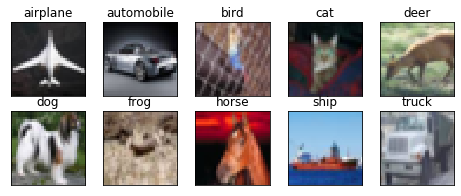

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
weight_decay = 1e-4
# Define the model
model = Sequential()
model.add(SeparableConv2D(64, (3,3), kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3))) #30 #3X3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(64, (3,3), kernel_regularizer=regularizers.l2(weight_decay))) #28 #5X5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3,3), kernel_regularizer=regularizers.l2(weight_decay)))#26 #7X7
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))#13 #8X8
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1), kernel_regularizer=regularizers.l2(weight_decay))) #13 #8X8
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, (3,3), kernel_regularizer=regularizers.l2(weight_decay))) #11 #12X12
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(256, (3,3),kernel_regularizer=regularizers.l2(weight_decay))) #9 #16X16
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2,2))) #4 #18X18
model.add(Dropout(0.1))
 
model.add(SeparableConv2D(64, (1), kernel_regularizer=regularizers.l2(weight_decay))) #18X18
model.add(Activation('relu'))

model.add(SeparableConv2D(10, 1))
model.add(BatchNormalization())
model.add(Convolution2D(10, 4))
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))




In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_17 (Separab (None, 30, 30, 64)        283       
_________________________________________________________________
activation_17 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
separable_conv2d_18 (Separab (None, 28, 28, 64)        4736      
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.005.
390/390 [==============================] - 56s 142ms/step - loss: 1.5320 - acc: 0.4364 - val_loss: 1.9440 - val_acc: 0.4551
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0037907506.
390/390 [==============================] - 50s 129ms/step - loss: 1.2098 - acc: 0.5637 - val_loss: 1.2220 - val_acc: 0.5907
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0030525031.
390/390 [==============================] - 51s 130ms/step - loss: 1.0583 - acc: 0.6226 - val_loss: 1.1488 - val_acc: 0.6047
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002554931.
390/390 [==============================] - 51s 130ms/step - loss: 0.9628 - acc: 0.6580 - val_loss: 0.9109 - val_acc: 0.6869
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0021968366.
390/390 [==============================] - 51s 130ms/step - loss: 0.8981 - acc: 0.

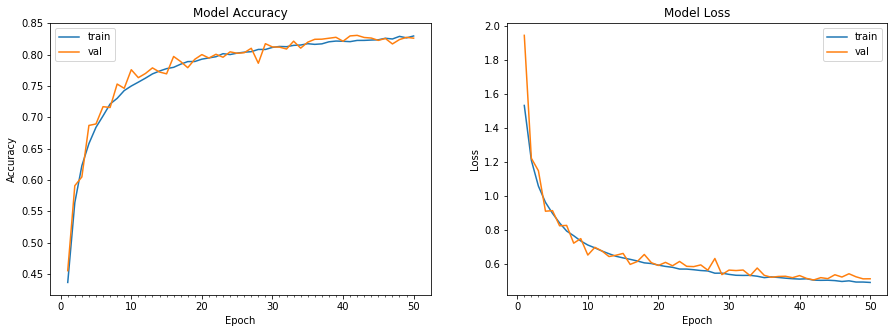

Accuracy on test data is: 82.61


In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
def scheduler(epoch, lr):
  return round(0.005 * 1/(1 + 0.319 * epoch), 10)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.001),
             metrics=['accuracy'])

datagen = ImageDataGenerator(
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True)
datagen.fit(train_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,callbacks=[LearningRateScheduler(scheduler, verbose=1)] )
end = time.time()
print ("Model2 took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))